## Семинар 2 "Распознавание рукописных цифр"

ФИО: Подоприхин Максим Александрович

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [3]:
i = 0
for k in train_loader:
    i += 1
print(i)

1875


In [4]:
j = 0
for k in test_loader:
    j += 1
print(j)

313


In [5]:
num_of_batch_train = i
num_of_batch_test = j

In [6]:
## Usage example
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    print(X.shape)
    a = X[1]
    a.reshape(1,-1)
    print(a.shape)
    print(y)
    break

(32, 784)
(784,)
[4 9 2 6 1 4 8 6 0 8 4 0 2 4 1 4 5 7 4 3 2 8 5 9 2 1 7 0 2 4 8 9]


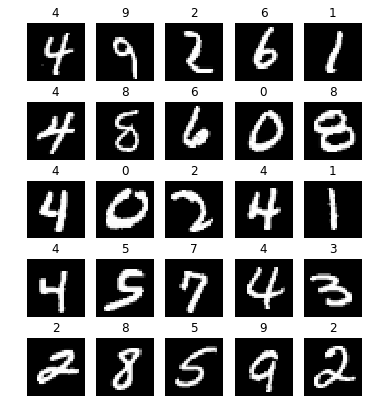

In [7]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [12]:
activation = Sigmoid()
#activation = ReLU()
#activation = ELU()
#activation = Tanh()

inner_dim = 100

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))
for i in range(len(layers)):
    print(layers[i])
net = NeuralNetwork(layers)
loss = NLLLoss()

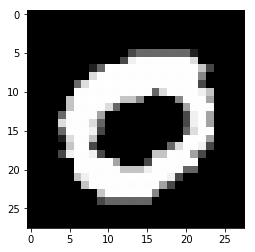

In [13]:
for X, y in train_loader:
    X = X.numpy()
    break
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.Greys_r)

In [14]:
x = net.forward(X[0].reshape(1, -1))[0]

order = np.argsort(x)[::-1]
print(order, x[order])

[8 3 1 5 7 2 9 4 6 0] [ 0.03457399  0.01933929 -0.00343566 -0.0054462  -0.02268425 -0.02889306
 -0.03594251 -0.05670423 -0.05863552 -0.06993599]


In [15]:
losses_sigm = []
sum_aq_sigm_train = 0
sum_aq_sigm_test = 0
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)   
    sum_aq_sigm_train += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])
    
    l = loss.forward(res, y)
    losses_sigm.append(l)
    
    dLdy = loss.backward()
    net.backward(dLdy)
    net.step(0.1)
    
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_sigm_test += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])

In [16]:
#activation = Sigmoid()
activation = ReLU()
#activation = ELU()
#activation = Tanh()

inner_dim = 100

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))
for i in range(len(layers)):
    print(layers[i])
net = NeuralNetwork(layers)
loss = NLLLoss()

In [17]:
good_relu_losses = []
sum_aq_relu_train = 0
sum_aq_relu_test = 0
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_relu_train += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])
    
    l = loss.forward(res, y)
    good_relu_losses.append(l)
    
    dLdy = loss.backward()
    net.backward(dLdy)
    net.step(0.1)

for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_relu_test += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])

In [18]:
#activation = Sigmoid()
#activation = ReLU()
activation = ELU()
#activation = Tanh()

inner_dim = 100

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))
for i in range(len(layers)):
    print(layers[i])
net = NeuralNetwork(layers)
loss = NLLLoss()

In [19]:
elu_losses = []
sum_aq_elu_train = 0
sum_aq_elu_test = 0
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_elu_train += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])
    
    l = loss.forward(res, y)
    elu_losses.append(l)
    
    dLdy = loss.backward()
    net.backward(dLdy)
    net.step(0.1)

for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_elu_test += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])

In [20]:
#activation = Sigmoid()
#activation = ReLU()
#activation = ELU()
activation = Tanh()

inner_dim = 100

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))
for i in range(len(layers)):
    print(layers[i])
net = NeuralNetwork(layers)
loss = NLLLoss()

In [21]:
losses_tanh = []
sum_aq_tanh_train = 0
sum_aq_tanh_test = 0
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_tanh_train += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])
    
    l = loss.forward(res, y)
    losses_tanh.append(l)
    
    dLdy = loss.backward()
    net.backward(dLdy)
    net.step(0.1)

for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_tanh_test += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])

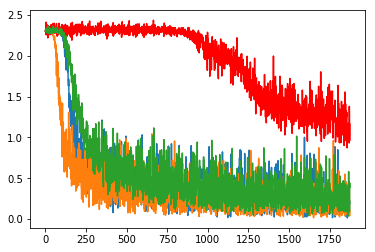

In [22]:
plt.plot(losses_sigm, '-r')
plt.plot(good_relu_losses)
plt.plot(elu_losses)
plt.plot(losses_tanh)
plt.show()

In [23]:
print('Accuracy for train data')
print('Accuracy Sigm:', sum_aq_sigm_train / (num_of_batch_train * 32))
print('Accuracy ReLU:', sum_aq_relu_train / (num_of_batch_train * 32))
print('Accuracy ELU:', sum_aq_elu_train / (num_of_batch_train * 32))
print('Accuracy Tanh:', sum_aq_tanh_train / (num_of_batch_train * 32))

Accuracy for train data
Accuracy Sigm: 0.26585
Accuracy ReLU: 0.8275666666666667
Accuracy ELU: 0.8688333333333333
Accuracy Tanh: 0.7973833333333333


In [24]:
print('Accuracy for test data')
print('Accuracy Sigm:', sum_aq_sigm_test / (num_of_batch_test * 32))
print('Accuracy ReLU:', sum_aq_relu_test / (num_of_batch_test * 32))
print('Accuracy ELU:', sum_aq_elu_test / (num_of_batch_test * 32))
print('Accuracy Tanh:', sum_aq_tanh_test / (num_of_batch_test * 32))

Accuracy for test data
Accuracy Sigm: 0.5737819488817891
Accuracy ReLU: 0.924620607028754
Accuracy ELU: 0.9389976038338658
Accuracy Tanh: 0.9161341853035144


### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [8]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = (X > 0).astype(float)*X
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return (self.s > 0).astype(float)*dLdy
    
    def step(self, learning_rate):
        pass

In [9]:
class ELU:
    '''
    ELU(x) = x, x > 0; a*(e^x - 1), x <= 0
    '''
    
    def __init__(self, a=1):
        self.a = a

    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        return X * (X > 0) + self.a * (np.exp(X) - 1) * (X <= 0)
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        X = self.X
        dydX = (X > 0) + self.a * np.exp(X) * (X <= 0)
        return dLdy*dydX

    def step(self, learning_rate):
        pass

In [10]:
x = np.array([1, 2])
(x > 1.5).astype(float)

array([0., 1.])

### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

In [25]:
errors = []

for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    
    for x_i, y_i in zip(X, y):
        l = loss.forward(x_i.reshape(1, -1), y_i.reshape(1, -1))
        errors.append((l, x_i.reshape(28, 28)))
    
    if len(errors) > 1000:
        break

In [26]:
errors.sort(key=lambda x: x[0], reverse=True)

In [27]:
print(errors[18][1])

[[-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296  0.81042576  1.1668162   1.1668162
   0.05945994 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.424212

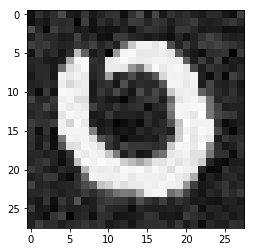

In [28]:
img = np.copy(errors[10][1])
img += np.random.randn(28*28).reshape(28, 28)*0.2
plt.imshow(img, cmap=plt.cm.Greys_r)
#print(errors[1000][0])

### HW1 (1 балл): Реализовать Tanh

In [11]:
class Tanh:
    def __init__(self):
        #self.W = np.random.randn(input_size, output_size) * 0.01
        #self.b = np.zeros(output_size) 
        #print(self.W)
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        self.tanh = (2 / (1 + 2 * np.exp(-X))) - 1
        return self.tanh
        #### YOUR CODE HERE
        #### Apply layer to input
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        self.dLdX = dLdy * (1 + self.tanh) * (1 - self.tanh)
        return self.dLdX
    
    def step(self, learning_rate):
        pass

In [29]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [30]:
activation = Tanh()
#activation = Sigmoid()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))
for i in range(len(layers)):
    print(layers[i])
net = NeuralNetwork(layers)
loss = NLLLoss()

In [31]:
losses_tanh = []
sum_aq_tanh_train = 0
sum_aq_tanh_test = 0
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses_tanh.append(l)
    sum_aq_tanh_train += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)
    
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    sum_aq_tanh_test += sum([np.argmax(res, axis = 1)[i] == y[i] for i in range(len(y))])

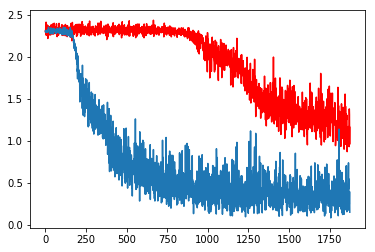

In [32]:
plt.plot(losses_sigm, '-r')
plt.plot(losses_tanh)
plt.show()

In [33]:
print('Accuracy train')
print('Accuracy Sigm:', sum_aq_sigm_train / (num_of_batch_train * 32))
print('Accuracy Tanh:', sum_aq_tanh_train / (num_of_batch_train * 32))

Accuracy train
Accuracy Sigm: 0.26585
Accuracy Tanh: 0.7472


In [34]:
print('Accuracy test')
print('Accuracy Sigm:', sum_aq_sigm_test / (num_of_batch_test * 32))
print('Accuracy Tanh:', sum_aq_tanh_test / (num_of_batch_test * 32))

Accuracy test
Accuracy Sigm: 0.5737819488817891
Accuracy Tanh: 0.9029552715654952


Теперь рассмортим, как изменится loss и точность, если пропустить датасет несколько раз через нейросеть

In [35]:
from IPython.display import clear_output
import sys
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Воспользуемся функцией:

In [36]:
def train(train_loader, test_loader, network, epochs,
          learning_rate, plot=True, verbose=True, loss=None):
    loss = loss or NLLLoss()
    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []
    try:
        for epoch in range(epochs):
            losses = []
            accuracies = []
            for X, y in train_loader:
                X = X.view(X.shape[0], -1).numpy()
                y = y.numpy()
                prediction = network.forward(X)
                loss_batch = loss.forward(prediction, y)
                losses.append(loss_batch)
                dLdx = loss.backward()
                network.backward(dLdx)
                network.step(learning_rate)
                accuracies.append((np.argmax(prediction, 1)==y).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))
            losses = []
            accuracies = []    
            for X, y in test_loader:
                X = X.view(X.shape[0], -1).numpy()
                y = y.numpy()
                prediction = network.forward(X)
                loss_batch = loss.forward(prediction, y)
                losses.append(loss_batch)
                accuracies.append((np.argmax(prediction, 1)==y).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))
            clear_output(True)
            if verbose:
                sys.stdout.write('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
                            epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                            train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(train_loss_epochs, label='Train')
                plt.plot(test_loss_epochs, label='Test')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(train_accuracy_epochs, label='Train accuracy')
                plt.plot(test_accuracy_epochs, label='Test accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()
    except KeyboardInterrupt:
        pass
    return train_loss_epochs, \
           test_loss_epochs, \
           train_accuracy_epochs, \
           test_accuracy_epochs

In [37]:
network = NeuralNetwork([Linear(784, 100), Sigmoid(),
               Linear(100, 100), Sigmoid(),
               Linear(100, 10)])
loss = NLLLoss()

Epoch 14... (Train/Test) NLL: 0.124/0.140	Accuracy: 0.967/0.962

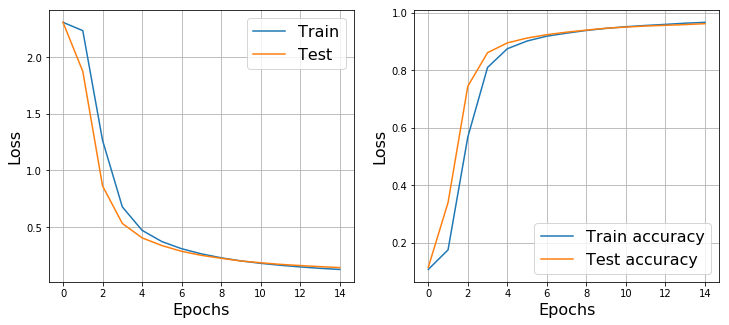

In [38]:
tr_s, ts_s, tr_ac_s, ts_ac_s = train(train_loader, test_loader, network, 15, 0.03)

Epoch 14... (Train/Test) NLL: 0.007/0.092	Accuracy: 0.999/0.979

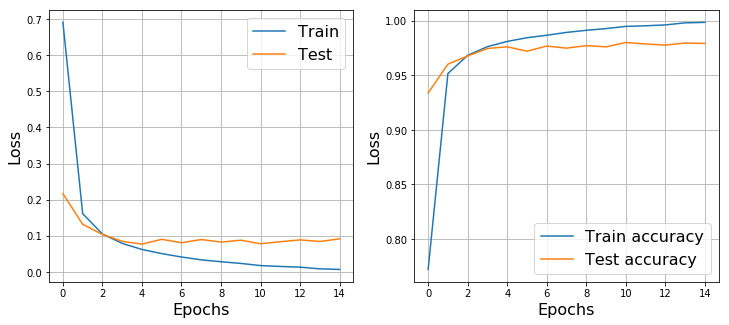

In [55]:
network = NeuralNetwork([Linear(784, 100), ReLU(),
               Linear(100, 100), ReLU(),
               Linear(100, 10)])
loss = NLLLoss()
tr_r, ts_r, tr_ac_r, ts_ac_r = train(train_loader, test_loader, network, 15, 0.04)

Epoch 14... (Train/Test) NLL: 0.012/0.082	Accuracy: 0.997/0.979

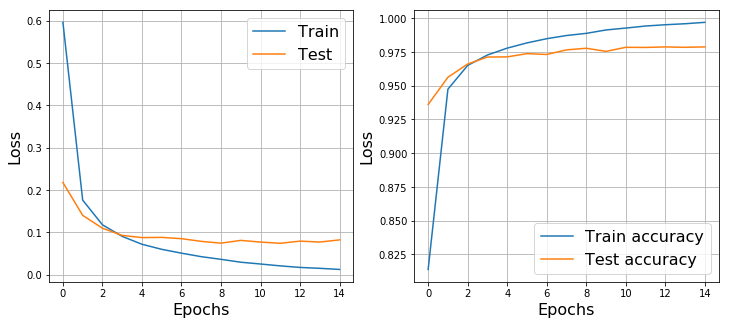

In [56]:
network = NeuralNetwork([Linear(784, 100), ELU(),
               Linear(100, 100), ELU(),
               Linear(100, 10)])
loss = NLLLoss()
tr_e, ts_e, tr_ac_e, ts_ac_e = train(train_loader, test_loader, network, 15, 0.04)

Epoch 14... (Train/Test) NLL: 0.008/0.080	Accuracy: 0.999/0.977

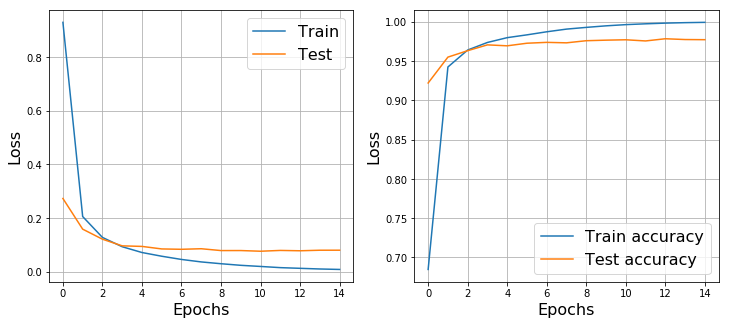

In [57]:
network = NeuralNetwork([Linear(784, 100), Tanh(),
               Linear(100, 100), Tanh(),
               Linear(100, 10)])
loss = NLLLoss()
tr_t, ts_t, tr_ac_t, ts_ac_t = train(train_loader, test_loader, network, 15, 0.04)

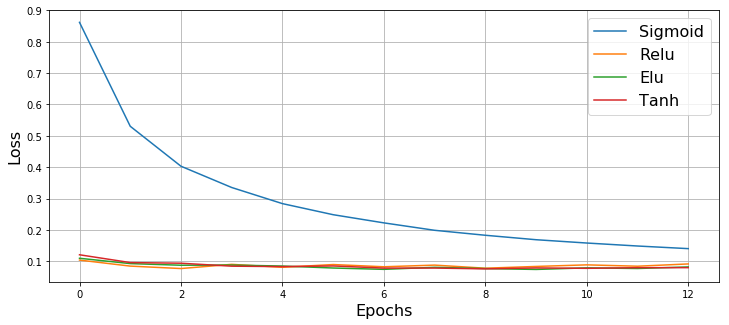

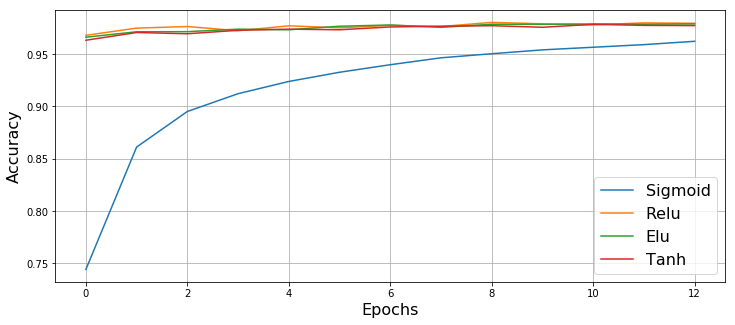

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(ts_s[2:], label='Sigmoid')
plt.plot(ts_r[2:], label='Relu')
plt.plot(ts_e[2:], label='Elu')
plt.plot(ts_t[2:], label='Tanh')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid('on')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(ts_ac_s[2:], label='Sigmoid')
plt.plot(ts_ac_r[2:], label='Relu')
plt.plot(ts_ac_e[2:], label='Elu')
plt.plot(ts_ac_t[2:], label='Tanh')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid('on')
plt.show()

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

In [43]:
def LearnWithAugmentation(transform):
    train_dataset = MNIST('.', train=True, download=True, transform=transform)
    test_dataset = MNIST('.', train=False, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
    
    network = NeuralNetwork([Linear(784, 100), ReLU(),
               Linear(100, 100), ReLU(),
               Linear(100, 10)])
    
    tr_, ts_, tr_ac_, ts_ac_ = train(train_loader, test_loader, network,
                                     10, 0.04, plot=True, verbose=True)

    return ts_ac_

In [44]:
import pandas as pd
scores_aug = pd.DataFrame(columns=['without augmentations', 'rotate', 'noise', 'affine', 'all'], index=range(10))

In [45]:
scores_aug['without augmentations'] = ts_ac_r

In [46]:
#поворот

Epoch 9... (Train/Test) NLL: 0.066/0.079	Accuracy: 0.979/0.976

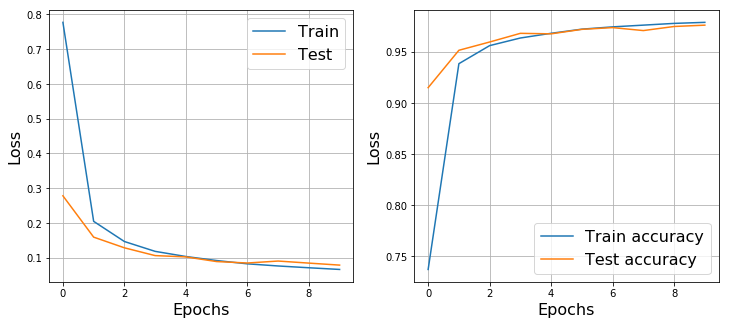

In [47]:
transform = transforms.Compose([
                   transforms.RandomRotation(degrees=(-15,15)),
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
                ])
scores_aug['rotate'] = LearnWithAugmentation(transform)

In [48]:
#смещение

Epoch 9... (Train/Test) NLL: 0.067/0.086	Accuracy: 0.979/0.974

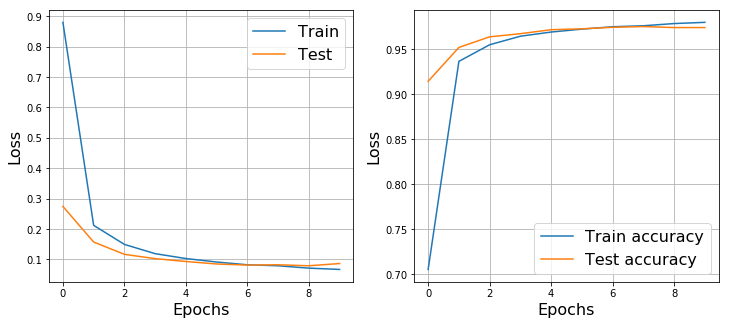

In [49]:
transform = transforms.Compose([
                   transforms.RandomAffine(degrees=0, translate=(0.05,0.05)),
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
                ])
scores_aug['affine'] = LearnWithAugmentation(transform)

In [50]:
#шум

Epoch 9... (Train/Test) NLL: 0.036/0.081	Accuracy: 0.988/0.976

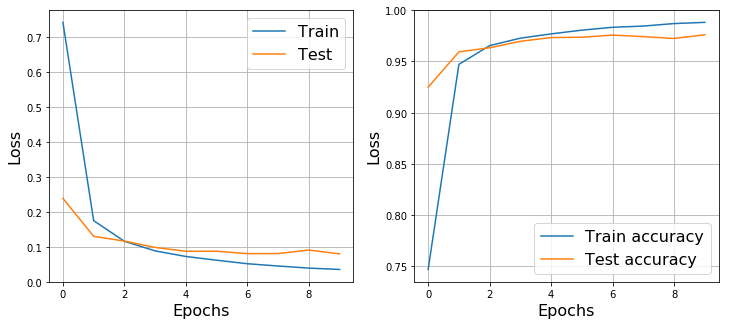

In [51]:
import torch
noise = transforms.Lambda(lambda x : x +  0.1 * torch.randn_like(x))
transform = transforms.Compose([
                   transforms.ToTensor(),
                   noise,
                   transforms.Normalize((0.1307,), (0.3081,))
                ])
scores_aug['noise'] = LearnWithAugmentation(transform)

In [52]:
#все вместе

Epoch 9... (Train/Test) NLL: 0.102/0.098	Accuracy: 0.968/0.969

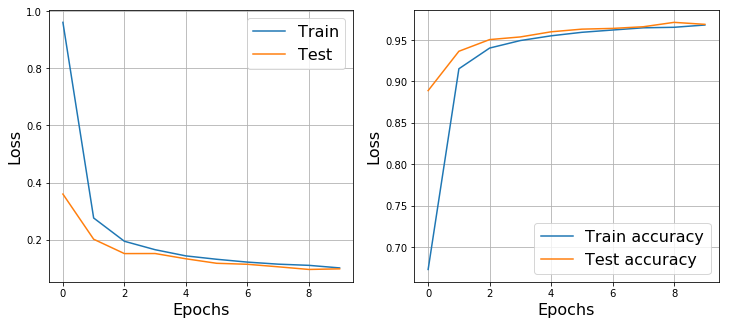

In [53]:
transform = transforms.Compose([
                       transforms.RandomAffine(degrees=(-15,15),
                                               translate=(0.05,0.05)),
                       transforms.ToTensor(),
                       transforms.Lambda(lambda x : x +  0.1 * torch.randn_like(x)),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])

scores_aug['all'] = LearnWithAugmentation(transform)

In [54]:
scores_aug

,without augmentations,rotate,noise,affine,all
0,0.936202,0.914836,0.924820,0.914038,0.888778
1,0.955671,0.951378,0.959365,0.951577,0.936202
2,0.962959,0.959465,0.963359,0.963359,0.950280
3,0.970747,0.967951,0.969649,0.966853,0.953474
4,0.973343,0.967452,0.973343,0.971246,0.959665
5,0.976637,0.971845,0.973642,0.972244,0.962859
6,0.975938,0.973542,0.975739,0.973942,0.963758
7,0.977736,0.970647,0.974241,0.974740,0.965755
8,0.977736,0.974641,0.972444,0.973642,0.971046
9,0.972344,0.975938,0.976038,0.973642,0.968650


Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [1]:
#смотри выше

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?

Как мы видим, все рассмотренные функции активации(кроме сигмоиды) одинаково хорошо себя показывают.
Что касается предобработки данных, смещение и вращение так же можно использовать, сходимость лучше, но не очень сильно, поэтому особых приемуществ они не дают (по-крайней мере в данном случае).

В итоге имеем, что выбор нелинейности и предобработка данных влияют на конечный результат (иногда давольно сильно)